<a href="https://colab.research.google.com/github/amnnsharma/GlidePro/blob/main/Pump_Off_Control_SRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SRP WELL SECTION


In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
import tqdm
from itertools import product
from typing import Union
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose, STL


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [174]:
%cd /content/drive/My Drive/
df= pd.read_excel("SRP Well.xlsx", sheet_name='4')

/content/drive/My Drive


In [177]:
def srp_load_analysis(df):
    period=24

    advanced_decomposition = STL(df.current1, period=period).fit()

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

    ax1.plot( advanced_decomposition.observed)
    ax1.set_ylabel('Observed')

    ax2.plot(advanced_decomposition.trend)
    ax2.set_ylabel('Trend')

    ax3.plot(advanced_decomposition.seasonal)
    ax3.set_ylabel('Seasonal')

    ax4.plot(advanced_decomposition.resid)
    ax4.set_ylabel('Residuals')


    fig.autofmt_xdate()
    plt.tight_layout()

    trend=advanced_decomposition.trend.to_list()
    df['date'] = pd.to_datetime(df['date'])
    df['date']

    message_high=False
    message_low=False
    average_current=trend[:period]
    x_low=[]
    y_low=[]
    x_ok=[]
    y_ok=[]
    x_high=[]
    y_high=[]
    offset_factor=0.1
    up_limit=1+offset_factor
    low_limit=1-offset_factor
    for i in range(period, len(advanced_decomposition.trend)):

      if (trend[i]> sum(average_current)/len(average_current) and trend[i]>up_limit*sum(average_current)/len(average_current)):
        x_high.append(df['date'].to_list()[i])
        y_high.append(trend[i])
        if message_high==False:
          x_high.append(df['date'].to_list()[i])
          y_high.append(trend[i])
          print("ALERT:")
          print("Since "+str(df['date'].to_list()[i]))
          print("#Load is increasing on the SRP system")
          print("#Unit balancing needed")
          message_high=True
          message_low=False


      elif (trend[i]< sum(average_current)/len(average_current) and trend[i]<low_limit*sum(average_current)/len(average_current)):
        x_low.append(df['date'].to_list()[i])
        y_low.append(trend[i])
        if message_low==False:
          x_low.append(df['date'].to_list()[i])
          y_low.append(trend[i])
          print("ALERT:")
          print("Since "+str(df['date'].to_list()[i]))
          print("#Load is decreasing on the SRP system")
          print("#Unit balancing needed")
          message_high=False
          message_low=True



      else:
        average_current.append(trend[i])
        x_ok.append(df['date'].to_list()[i])
        y_ok.append(trend[i])
        message_high=False
        message_low=False


    fig, ax=plt.subplots(figsize=(10, 6))

    ax.plot(x_high, y_high, color='red', linestyle='', label="Load increased", marker='.')
    ax.plot(x_ok, y_ok, color='blue', linestyle='', label="Nominal Load", marker='.')
    ax.plot(x_low, y_low, color='y', linestyle='', label="Load decreased", marker='.')

    ax.set_yticklabels([])
    ax.set_xlabel("Date")
    ax.set_ylabel("Current Trend")
    fig.autofmt_xdate()
    plt.tight_layout()
    ax.legend()

    plt.plot()

ALERT:
Since 2024-04-20 10:03:24
#Load is increasing on the SRP system
#Unit balancing needed


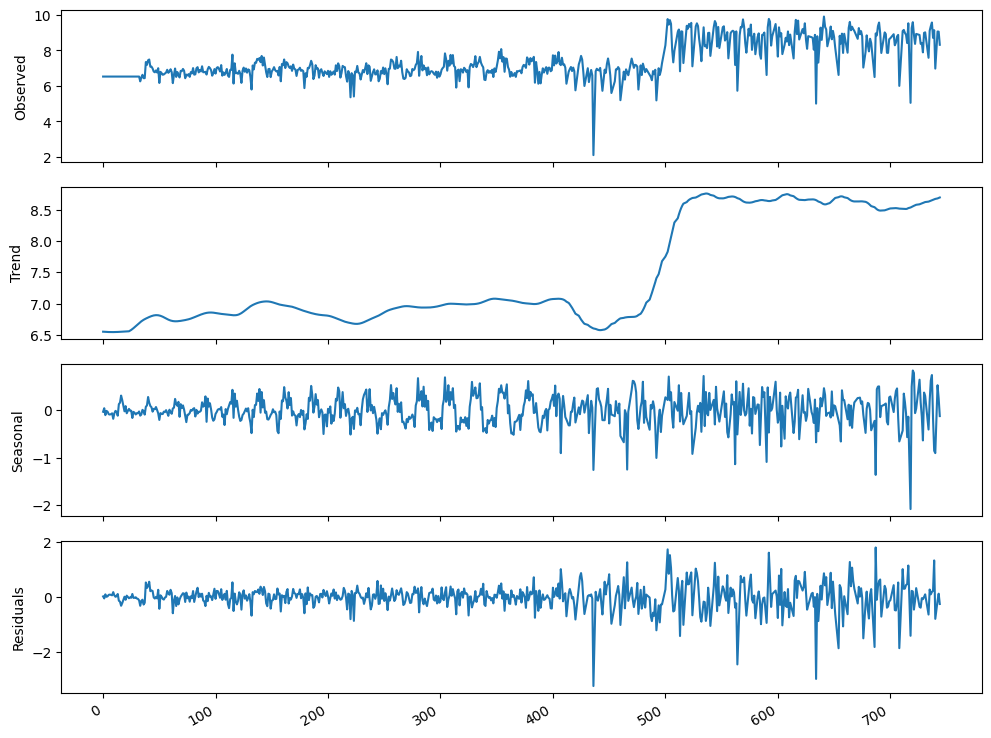

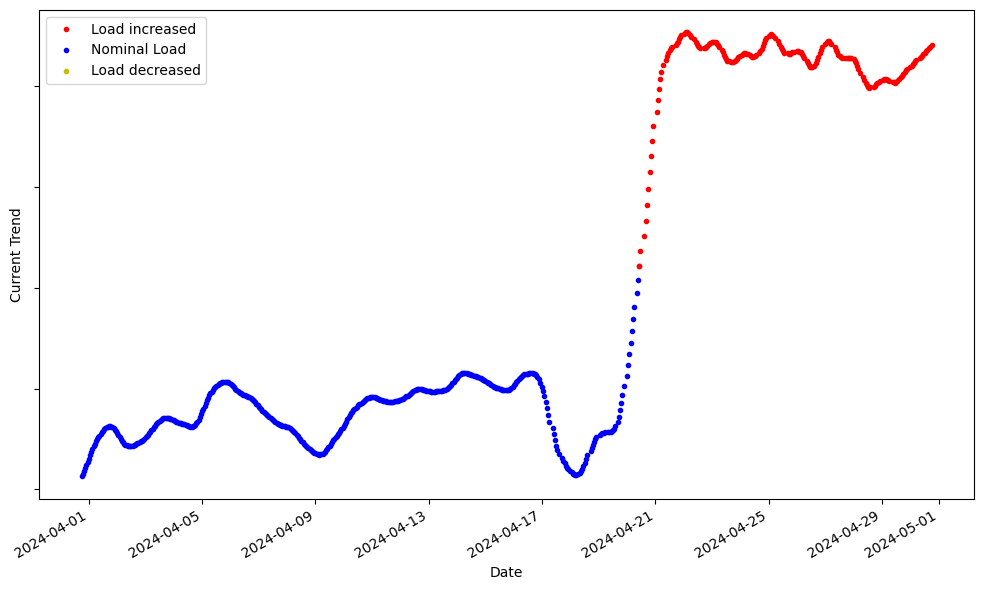

In [178]:
df.columns=['date', 'voltage1', 'voltage1', 'voltage1','power1','name', 'current1', 'current2', 'current3', 'power2', 'status']
df = df.iloc[5:, :]
df.reset_index(drop=True, inplace=True)
#df['date'] = pd.to_datetime(df['date'])
df = df[df['status'] == 'ON']
df=df.drop(df.columns[[5, 10]], axis=1)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d %H:%M:%S')

for
srp_load_analysis(df)

In [134]:
'''
import matplotlib.pyplot as plt

# Sample list
data = [3, 7, 12, 2, 8, 15, 4, 6, 9, 11]

# Plot the data
for i, value in enumerate(data):
    if value > 10:
        plt.plot([i, i+1], [value, data[i+1]], color='red')
    elif value < 5:
        plt.plot([i, i+1], [value, data[i+1]], color='yellow')
    else:
        plt.plot([i, i+1], [value, data[i+1]], color='green')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Colorful Lines Plot')
plt.show()
'''

"\nimport matplotlib.pyplot as plt\n\n# Sample list\ndata = [3, 7, 12, 2, 8, 15, 4, 6, 9, 11]\n\n# Plot the data\nfor i, value in enumerate(data):\n    if value > 10:\n        plt.plot([i, i+1], [value, data[i+1]], color='red')\n    elif value < 5:\n        plt.plot([i, i+1], [value, data[i+1]], color='yellow')\n    else:\n        plt.plot([i, i+1], [value, data[i+1]], color='green')\n\nplt.xlabel('Index')\nplt.ylabel('Value')\nplt.title('Colorful Lines Plot')\nplt.show()\n"

In [135]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [136]:
ADF_result = adfuller(np.diff(df.current1, n=1))

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -8.683277932360838
p-value: 4.229239272725036e-14


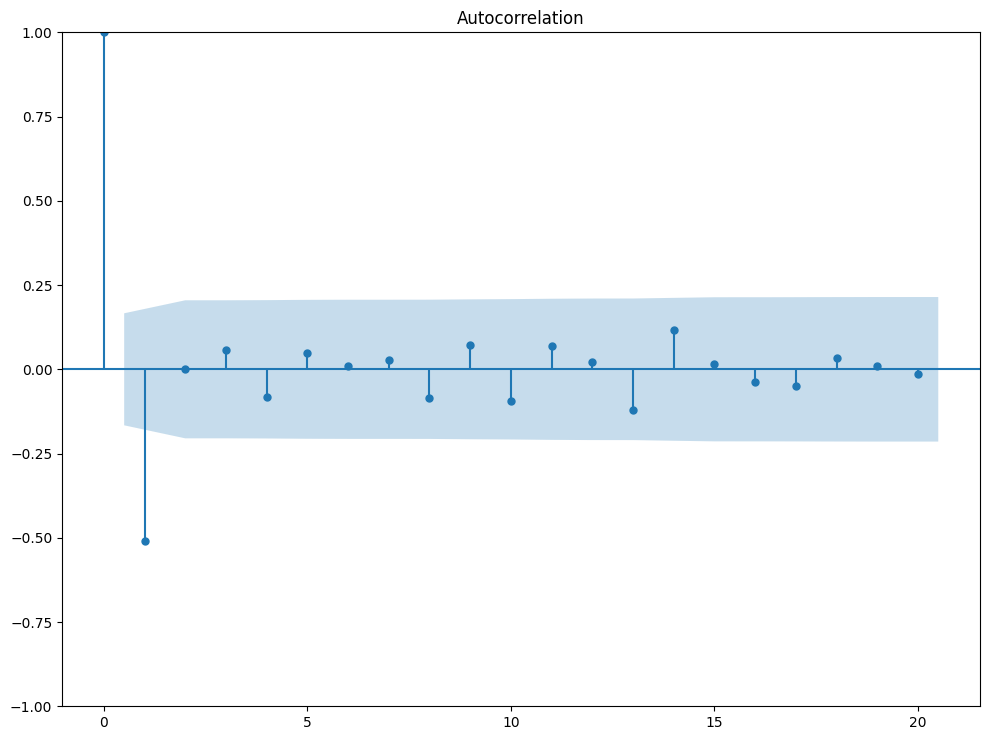

In [137]:
plot_acf(np.diff(df.current1, n=1), lags=20)

plt.tight_layout()

In [138]:
from prophet import Prophet
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics

from sklearn.metrics import mean_absolute_error

from itertools import product

import warnings
warnings.filterwarnings('ignore')

In [139]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

In [140]:
df=df[['date', 'current1']]
df.columns=['ds','y']
train = df[:-100]
test = df[-100:]

In [141]:
train['ds']=pd.to_datetime(train['ds'])
train.shape

(40, 2)

In [142]:
train.reset_index(drop=True, inplace=True)

In [143]:
test['ds']=pd.to_datetime(test['ds'])
test.shape

(100, 2)

In [144]:
test.reset_index(drop=True, inplace=True)

In [145]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=100, freq='H')
print(future.shape)
forecast = m.predict(future)
print(forecast.shape)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph21e2d3_/ubtngazs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph21e2d3_/uyx81rtv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66988', 'data', 'file=/tmp/tmph21e2d3_/ubtngazs.json', 'init=/tmp/tmph21e2d3_/uyx81rtv.json', 'output', 'file=/tmp/tmph21e2d3_/prophet_modelw88dar69/prophet_model-20240501102318.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:23:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:23:18 - cmdstanpy - INFO - Chai

(140, 1)
(140, 13)


,ds,yhat,yhat_lower,yhat_upper
0,2024-04-23 15:59:29,27.019407,22.403324,31.749270
1,2024-04-23 16:59:29,26.983569,22.578948,31.275817
2,2024-04-23 17:59:29,26.947730,22.151855,31.704531
3,2024-04-23 18:59:29,26.911892,22.319574,31.769158
4,2024-04-23 19:59:29,26.876053,22.240412,31.251744
...,...,...,...,...
135,2024-04-29 07:59:29,22.145429,17.139841,26.829001
136,2024-04-29 08:59:29,22.109592,17.581174,26.550586
137,2024-04-29 09:59:29,22.073754,17.699648,27.087524
138,2024-04-29 10:59:29,22.037916,17.229217,26.621688


All plots done


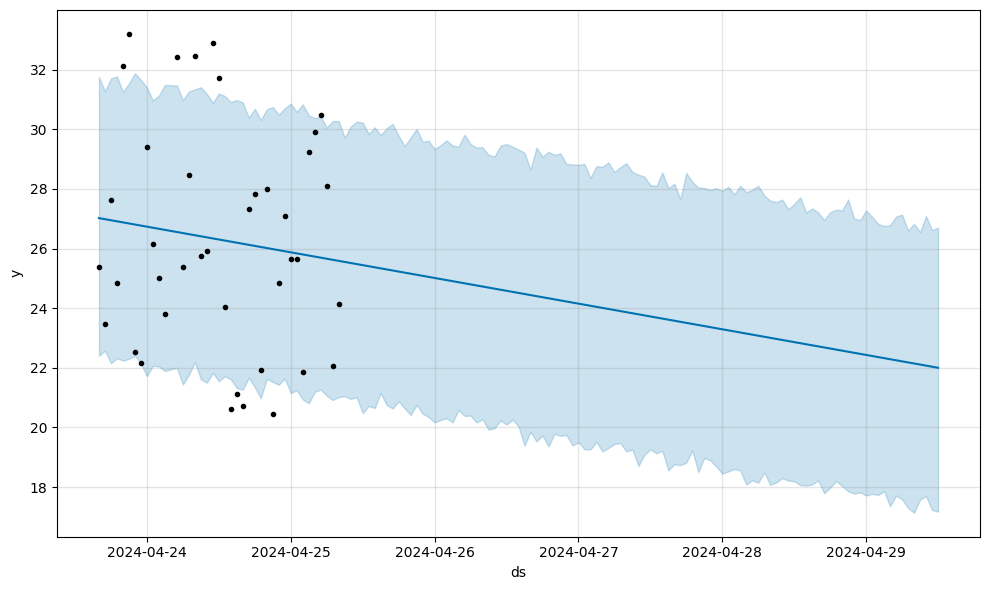

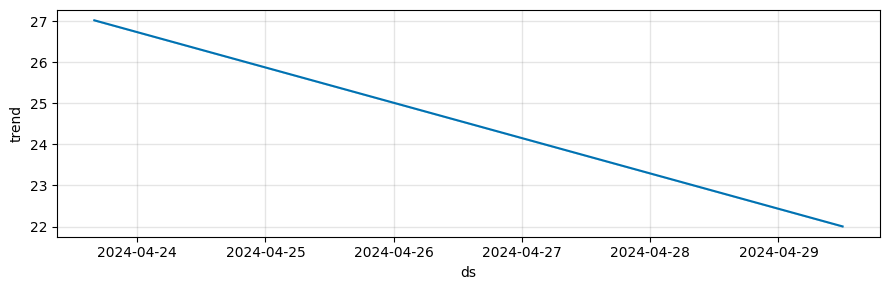

In [146]:
m.plot(forecast)
m.plot_components(forecast)
print("All plots done")

In [147]:
forecast.reset_index(drop=True, inplace=True)

In [148]:
forecast.shape

(140, 13)

In [149]:
test

,ds,y
0,2024-04-25 08:59:29,30.238852
1,2024-04-25 09:59:29,31.100456
2,2024-04-25 10:59:29,29.020000
3,2024-04-25 11:59:29,24.841663
4,2024-04-25 12:59:29,31.185566
...,...,...
95,2024-04-30 11:59:29,19.376095
96,2024-04-30 12:59:29,20.339289
97,2024-04-30 13:59:29,20.194452
98,2024-04-30 14:59:29,20.065140


In [150]:
forecast=forecast[['yhat', 'yhat_lower', 'yhat_upper']][-50:]

In [151]:
forecast.reset_index(drop=True, inplace=True)

In [152]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
test.head()

,ds,y,yhat,yhat_lower,yhat_upper
0,2024-04-25 08:59:29,30.238852,23.758138,19.077320,28.414006
1,2024-04-25 09:59:29,31.100456,23.722300,19.268379,28.125821
2,2024-04-25 10:59:29,29.020000,23.686462,19.132978,28.095383
3,2024-04-25 11:59:29,24.841663,23.650624,19.216202,28.550856
4,2024-04-25 12:59:29,31.185566,23.614786,18.557538,28.025385


In [153]:
test['baseline'] = train['y'][-100:].values
test.head()

ValueError: Length of values (40) does not match length of index (100)

In [ ]:
from sklearn.metrics import mean_absolute_error

prophet_mae = mean_absolute_error(test['y'], test['yhat'])
baseline_mae = mean_absolute_error(test['y'], test['baseline'])

print(prophet_mae)
print(baseline_mae)

In [ ]:
test.iloc[49]

In [ ]:
test.index = range(int(train.shape[0]), 50 + int(train.shape[0]))

In [ ]:
fig, ax = plt.subplots()

ax.plot(train['y'])
ax.plot(test['y'], 'b-', label='Actual')
ax.plot(test['yhat'], color='darkorange', ls='--', lw=3, label='Predictions')
ax.plot(test['baseline'], 'k:', label='Baseline')

ax.set_xlabel('Date')
ax.set_ylabel('Current')

ax.axvspan(3285, 3649, color='#808080', alpha=0.1)

ax.legend(loc='best')

#plt.xticks(
#    [3224, 3254, 3285, 3316, 3344, 3375, 3405, 3436, 3466, 3497, 3528, 3558, 3589, 3619],
#    ['Nov', 'Dec', 'Jan 1990', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
#plt.fill_between(x=test.index, y1=test['yhat_lower'], y2=test['yhat_upper'], color='lightblue')
plt.xlim(0, test.shape[0]+train.shape[0])

fig.autofmt_xdate()
#plt.tight_layout()

#plt.savefig('figures/CH19_F03_peixeiro.png', dpi=300)

In [ ]:
#m.plot(forecast)